In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

sns.set_palette("muted")

### Correlation between IQ and brain size

In [2]:
fpath_brain = (
    "/mnt/c/notebooks/ds-101/auxiliary/1-statistics/task-4/brain.tsv"
)
df_brain = pd.read_csv(fpath_brain, sep="\t")

In [3]:
df_brain.head(3)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,�,72.5,1001121
2,Male,139,123,150,143,73.3,1038437


In [4]:
df_brain.describe(include="all")

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40,40.000000,40.000000,40.00000,40,40,4.000000e+01
unique,2,NaN,NaN,NaN,33,24,NaN
top,Female,NaN,NaN,NaN,155,64.5,NaN
freq,20,NaN,NaN,NaN,2,4,NaN
mean,NaN,113.450000,112.350000,111.02500,NaN,NaN,9.087550e+05
std,NaN,24.082071,23.616107,22.47105,NaN,NaN,7.228205e+04
min,NaN,77.000000,71.000000,72.00000,NaN,NaN,7.906190e+05
25%,NaN,89.750000,90.000000,88.25000,NaN,NaN,8.559185e+05
50%,NaN,116.500000,113.000000,115.00000,NaN,NaN,9.053990e+05
75%,NaN,135.500000,129.750000,128.00000,NaN,NaN,9.500780e+05


Checking statistical significance of correlation coefficients.

$H_0$: r = 0

$H_1$: r $\neq$ 0

In [5]:
def pearsonr_ci(x, y, alpha=0.05):
    r, p = stats.pearsonr(x, y)
    r_z = np.arctanh(r)
    se = 1 / np.sqrt(x.size - 3)
    z = stats.norm.ppf(1 - alpha / 2)
    lo_z, hi_z = r_z - z * se, r_z + z * se
    lo, hi = np.tanh((lo_z, hi_z))

    print(
        f"Pearson’s correlation coefficient: {r}"
        + f"\np-value = {p}"
        + (
            "\nalternative hypothesis: true correlation is not equal to 0"
            if p < alpha
            else "\nnull hypothesis: true correlation is equal to 0"
        )
        + f"\n{int((1 - alpha) * 100)} percent confidence interval:"
        + f"\n {lo} {hi}"
    )
    
    return r, p, lo, hi

#### Joint

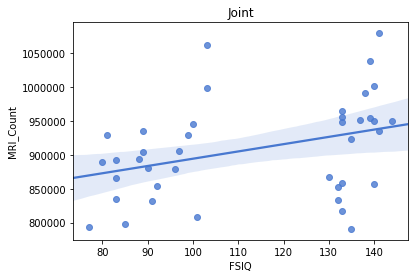

In [6]:
_ = sns.regplot(x="FSIQ", y="MRI_Count", data=df_brain).set_title("Joint")

In [7]:
_ = pearsonr_ci(df_brain["FSIQ"], df_brain["MRI_Count"])

Pearson’s correlation coefficient: 0.35764096936905665
p-value = 0.02346891262690166
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05191544222484481 0.6020741383685153


#### Male

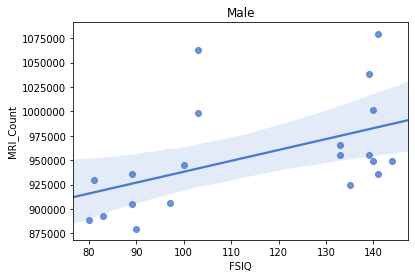

In [8]:
df_brain_male = df_brain[df_brain["Gender"] == "Male"]
_ = sns.regplot(x="FSIQ", y="MRI_Count", data=df_brain_male).set_title("Male")

In [9]:
_ = pearsonr_ci(df_brain_male["FSIQ"], df_brain_male["MRI_Count"])

Pearson’s correlation coefficient: 0.49836911041719256
p-value = 0.025319401349742674
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.0716499041642297 0.7708808425340984


#### Female

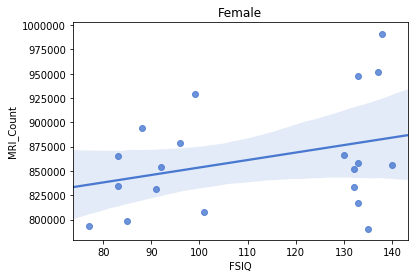

In [10]:
df_brain_female = df_brain[df_brain["Gender"] == "Female"]
_ = sns.regplot(x="FSIQ", y="MRI_Count", data=df_brain_female).set_title("Female")

In [11]:
_ = pearsonr_ci(df_brain_female["FSIQ"], df_brain_female["MRI_Count"])

Pearson’s correlation coefficient: 0.3256967004963705
p-value = 0.1611157761890763
null hypothesis: true correlation is equal to 0
95 percent confidence interval:
 -0.13649707130487787 0.671443910988199


### Car preferences for men and women 

In [12]:
fpath_carprefs = (
    "/mnt/c/notebooks/ds-101/auxiliary/1-statistics/task-4/carprefs.tsv"
)
df_carprefs = pd.read_csv(fpath_carprefs, sep="\t")

In [13]:
df_carprefs.head(3)

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
0,110,18,2,0,2,3,2,2,2,2,...,4,3,3,3,3,3,3,3,3,2
1,111,25,1,8,0,1,2,2,1,1,...,4,4,4,4,3,4,4,2,3,3
2,112,63,2,46,0,3,2,2,3,2,...,3,3,3,3,3,3,3,3,3,3


In [14]:
df_carprefs.describe(include="all")

,ID,Age,Sex,LicYr,LicMth,ActCar,Kids5,Kids6,PreferCar,Car15K,...,Reliable,Perform,Fuel,Safety,AC/PS,Park,Room,Doors,Prestige,Colour
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,209.986667,34.123333,1.500000,15.240000,0.620000,2.000000,1.903333,1.736667,2.17000,1.536667,...,3.830000,3.336667,3.293333,3.576667,2.876667,2.716667,2.990000,2.546667,2.100000,2.186667
std,108.131562,15.344695,0.500835,14.424376,1.995547,0.817861,0.295997,0.441178,0.86618,0.499487,...,0.393637,0.681815,0.664903,0.631494,1.002400,0.905052,0.738275,1.008901,0.897786,0.928095
min,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,117.750000,21.000000,1.000000,3.000000,0.000000,1.000000,2.000000,1.000000,2.00000,1.000000,...,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000
50%,206.500000,27.000000,1.500000,9.000000,0.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
75%,307.250000,46.000000,2.000000,26.000000,0.000000,3.000000,2.000000,2.000000,3.00000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,393.000000,75.000000,2.000000,57.000000,11.000000,3.000000,2.000000,2.000000,4.00000,2.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [15]:
def chi2_test(df, var1, var2, alpha=0.05):
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(
        f"H0: {var1} and {var2} are independent."
        + f"\nH1: {var1} and {var2} are not independent."
        + f"\nchi2: {chi2}\ndof: {dof}\np-value: {p}"
        + (
            f"\nalternative hypothesis: there is relationship between {var1} and {var2}"
            if p < alpha
            else f"\nnull hypothesis: there is no relationship between {var1} and {var2}"
        )
    )

    return chi2, p, dof, expected

In [16]:
variables = list(set(list(df_carprefs)) - {"ID", "Age", "Sex"})
alpha = 0.05
dependent = []
non_dependent = []

for var in variables:
    print(f"\n=== Checking dependency between Sex and {var} ===")
    _, p, _, _ = chi2_test(df_carprefs, "Sex", var, alpha)
    if p < alpha:
        dependent.append(var)
    else:
        non_dependent.append(var)

print(
    "\n=== Summary ==="
    + f"\nPreferences in following features differ between men and women:\n{', '.join(dependent)}"
    + f"\n\nPreferences in following features are gender independent:\n{', '.join(non_dependent)}"
)


=== Checking dependency between Sex and Cost ===
H0: Sex and Cost are independent.
H1: Sex and Cost are not independent.
chi2: 8.666070018425902
dof: 3
p-value: 0.03407647064935651
alternative hypothesis: there is relationship between Sex and Cost

=== Checking dependency between Sex and Reason ===
H0: Sex and Reason are independent.
H1: Sex and Reason are not independent.
chi2: 24.033907173922653
dof: 5
p-value: 0.0002138796434356735
alternative hypothesis: there is relationship between Sex and Reason

=== Checking dependency between Sex and Kids6 ===
H0: Sex and Kids6 are independent.
H1: Sex and Kids6 are not independent.
chi2: 0.2749298356148691
dof: 1
p-value: 0.6000438044346689
null hypothesis: there is no relationship between Sex and Kids6

=== Checking dependency between Sex and LicMth ===
H0: Sex and LicMth are independent.
H1: Sex and LicMth are not independent.
chi2: 6.37593984962406
dof: 10
p-value: 0.782751741971121
null hypothesis: there is no relationship between Sex an